![for sale image, from https://time.com/5835778/selling-home-coronavirus/](https://api.time.com/wp-content/uploads/2020/05/selling-home-coronavirus.jpg?w=800&quality=85)

# Project Title

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Questions to consider:

- Who are your stakeholders?
- What are your stakeholders' pain points related to this project?
- Why are your predictions important from a business perspective?

## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

In [81]:
#libraries

import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')


#load kings county house data

df = pd.read_csv('../../data/kc_house_data.csv')

df['date'] = pd.to_datetime(df['date'])

#inspect
print(df.zipcode.value_counts())

print(df.info())


#drop useless rows
df_limited = df.drop(["waterfront","view","lat","long","sqft_above","sqft_basement","yr_renovated"],axis=1,inplace=False)



98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object   

[ 281194.87  234284.04  294111.28 1356523.99  810289.7   859938.55
  617254.02  645628.23  423665.99  490377.11  455617.11  424815.06
  316742.39  286742.81  586120.88  617053.97  462488.87  612642.74
  296187.98  300340.4   251296.24  803990.82  521740.01  367091.48
 2161300.   1194873.64  311580.34  440232.31  645244.23  677215.03
  304262.11  420895.48  353619.07  493625.31  529629.78  489382.02
  570073.52  685675.84  790734.7   682885.99  334921.06  899607.67
  585048.78  863228.94  319581.39  579109.81  355678.52  880077.75
 1096239.01  619944.15  618695.11  576834.81  418019.36  849714.81
  634558.14  469928.77  424734.6   387011.59  551768.52  594706.54
  359496.26  284908.6   423736.91  464322.39  240328.37  676419.39
  310612.76  289078.35  302896.74  792187.87]


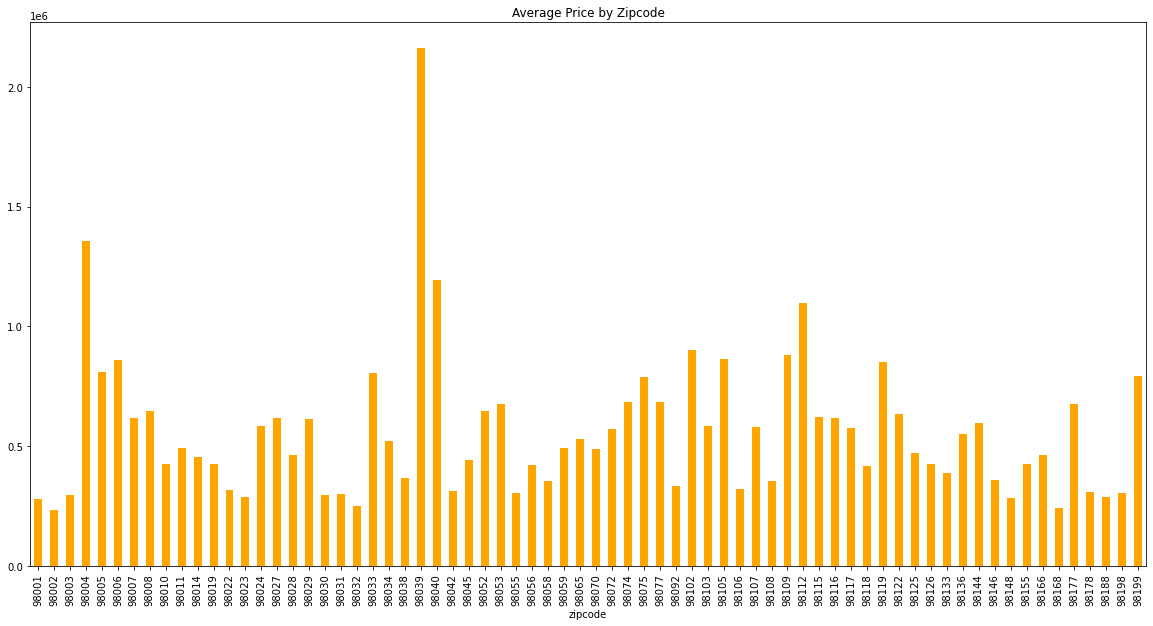

In [116]:
#graph mean price over zipcode

avg_price_zipcode = df.groupby("zipcode")["price"].mean().round(2)

avg_price_zipcode.index

print(avg_price_zipcode.values)

avg_price_zipcode.plot(kind='bar',figsize=(20,10),title="Average Price by Zipcode", color="orange");
#fig,ax = plt.subplots()




<AxesSubplot:title={'center':'Total Sales Per Zipcode'}, xlabel='zipcode,zipcode'>

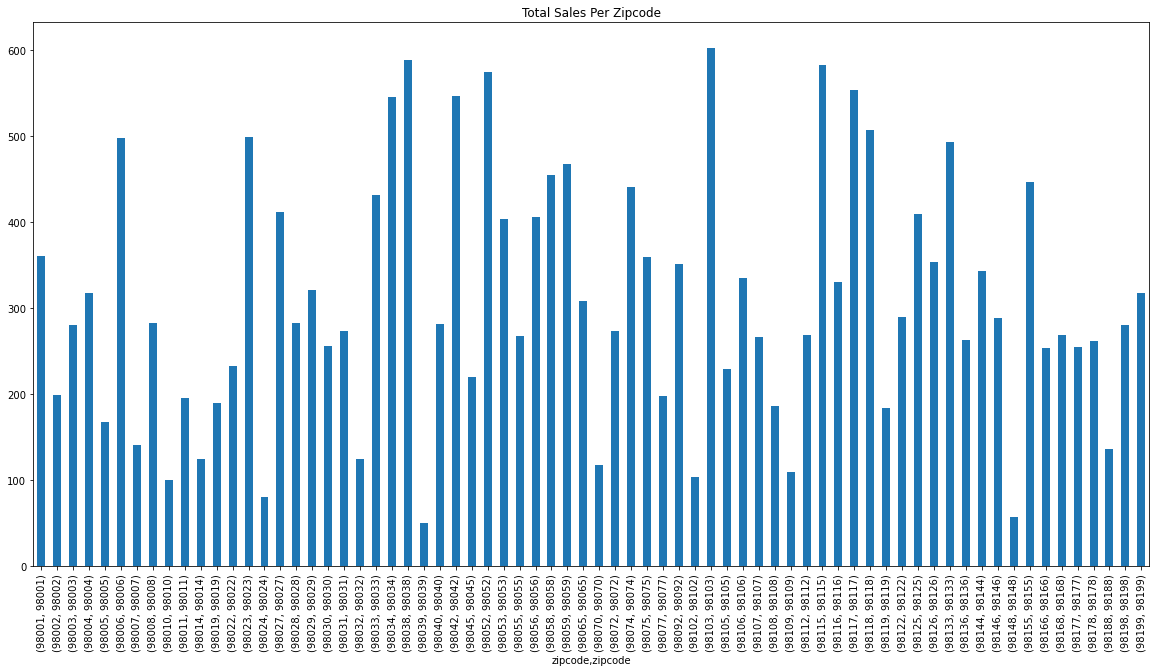

In [117]:
#graph total sales per zipcode



sales_over_zipcode = df.groupby("zipcode")["zipcode"].value_counts()

sales_over_zipcode.plot(kind='bar',figsize = (20,10), title= "Total Sales Per Zipcode")

In [126]:
#map the mean sales price data

import folium

map = folium.Map(location = [47.56,-122.26],default_zoom_start = .5)
map
"""
map.choropleth(geo_data="zip_codes.geojson",data = avg_price_zipcode,columns= ["Price"])

https://medium.com/analytics-vidhya/data-visualizations-for-zip-codes-2bbf1e16cab0
"""

FileNotFoundError: [Errno 2] No such file or directory: 'zip_codes.geojson'

## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   yr_built       21597 non-null  int64         
 9   yr_renovated   17755 non-null  float64       
 10  zipcode        21597 non-null  int64         
 11  sqft_living15  21597 non-null  int64         
 12  sqft_lot15     21597 non-null  int64         
 13  Average        21597 non-null  float64       
 14  Fair           21597 non-null  float64       
 15  Good           2159

<AxesSubplot:>

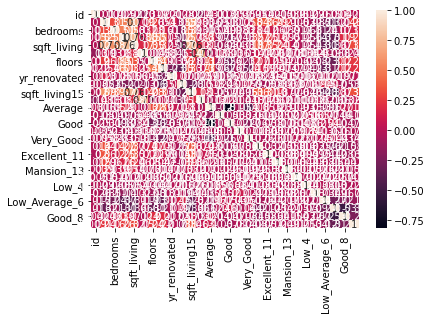

In [82]:
# code here to prepare your data

# make categorical variables into organizable levels: condition (1-5), grade (1-13), 

#convert condition to dummies

from sklearn.preprocessing import OneHotEncoder

condition_df = df_limited[["condition"]]

ohe = OneHotEncoder(categories="auto",sparse= False, handle_unknown="ignore")

ohe.fit(condition_df)

ohe.categories_

transformed_condition = ohe.transform(condition_df)
transformed_condition = pd.DataFrame(transformed_condition, columns = ohe.categories_[0], index= df_limited.index)

transformed_condition

df_limited.drop("condition",axis=1,inplace=True)

df_limited = pd.concat([df_limited, transformed_condition], axis=1)

df_limited.rename(columns = {"Very Good":"Very_Good"}, inplace=True)




#convert grade to dummies

grade_df = df_limited[["grade"]]

ohe.fit(grade_df)

ohe.categories

transformed_grade = ohe.transform(grade_df)
transformed_grade = pd.DataFrame(transformed_grade, columns = ohe.categories_[0], index = df_limited.index)

transformed_grade

df_limited.drop("grade",axis=1,inplace=True)

df_limited = pd.concat([df_limited, transformed_grade], axis=1)


# new names: Average_7 Good_8 Better_9 ,Low_Average_6, Very_Good_10, Excellent_11, Fair_5, Luxury_12, Low_4, Mansion_13, Poor_3

df_limited.rename(columns = {"7 Average":"Average_7","8 Good":"Good_8","9 Better":"Better_9",
                            "6 Low Average":"Low_Average_6", "10 Very Good":"Very_Good_10",
                             "11 Excellent":"Excellent_11","5 Fair":"Fair_5","12 Luxury":"Luxury_12", 
                             "4 Low":"Low_4","13 Mansion":"Mansion_13","3 Poor":"Poor_3"}
                            , inplace=True)



"""
for i in range(len(grade_df)):
    grade_df.at[i,"grade"] = grade_df.at[i,"grade"][:1]
    grade_df.at[i,"grade"].strip()
    grade_df.at[i,"grade"] = int(grade_df.at[i,"grade"])

print(type(grade_df.at[1,"grade"]))

df_limited.drop("grade",axis=1,inplace=True)
df_limited = pd.concat([df_limited, grade_df], axis=1)

df_limited.grade = df_limited.grade.astype(int)

"""

df_limited.info()

sns.heatmap(df_limited.corr(),annot=True)

In [118]:
# train test split

from sklearn.model_selection import train_test_split


In [86]:
grade_formula = "price ~ C(Average_7) + C(Good_8)" 
# + C(Better_9) + C(Low_Average_6) + C(Very_Good_10) + C(Excellent_11) + C(Fair_5) + C(Luxury_12) + C(Low_4) + C(Mansion_13) + C(Poor_3) "

SR_grade_model = smf.ols(formula = grade_formula, data = df_limited).fit()

SR_grade_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     1702.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:57:36   Log-Likelihood:            -3.0581e+05
No. Observations:               21597   AIC:                         6.116e+05
Df Residuals:                   21594   BIC:                         6.116e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            7.262e+05   4216.419    172.241      0.000    7.18e+05    7.35e+05
C(Average_7)[T.1.0] -3.236e+05   5547.080    -58.345      0.000   -3.35e+05   -3.13e+05
C(Good_8)[T.1.0]    -1.833e+05   6082.885    -30.126      0.000   -1.95e+05   -1.71e+05
==============================================================================
Omnibus:                    18649.272   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1352208.217
Skew:                           3.785   Prob(JB):                         0.00
Kurtosis:                      41.018   Cond. No.                         3.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
#datetime to price



## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze the data to arrive at an initial approach?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

### Baseline Understanding

- What does a baseline, model-less prediction look like?

In [33]:
# code here to arrive at a baseline prediction

### First $&(@# Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

In [ ]:
# code here for your first 'substandard' model

In [ ]:
# code here to evaluate your first 'substandard' model

### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

In [ ]:
# code here to iteratively improve your models

In [ ]:
# code here to evaluate your iterations

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

In [ ]:
# code here to show your final model

In [ ]:
# code here to evaluate your final model

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?
